In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [68]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [47]:
import os
import time
import uuid
from PIL import Image
import torchvision
import torchvision.transforms.functional as F
import torchvision.transforms as T

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\broth/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-29 Python-3.9.7 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [8]:
# img = 'G:/CSE_498r/project/dataset/images/DSC_0460.JPG'

In [9]:
# result = model(img)
# result.print()

In [10]:
# %matplotlib inline 
# plt.imshow(np.squeeze(result.render()))
# plt.show()

In [11]:
# !cd yolov5 && python train.py --img 640 --batch 32 --epochs 200 --data dataset.yml --weights yolov5s.pt --workers 2 --device 1

In [12]:
# !cd yolov5 && python train.py --img 640 --batch 12 --epochs 300 --data dataset.yml --weights yolov5s.pt --workers 2 --device 1

In [28]:
model01 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp22/weights/last.pt')

Using cache found in C:\Users\broth/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-29 Python-3.9.7 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [29]:
#image = cv2.imread('G:/CSE_498r/project/g_MG_0806.JPG')
image = cv2.imread('g_MG_0806.JPG')

In [30]:
result = model01(image)
result.print()

image 1/1: 3456x5184 1 license-plate
Speed: 27.9ms pre-process, 323.0ms inference, 23.9ms NMS per image at shape (1, 3, 448, 640)


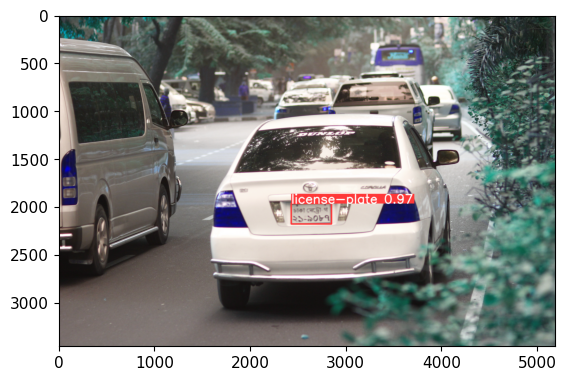

In [31]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [32]:
result.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,2427.9104,1967.391724,2848.901855,2181.733887,0.966565,0,license-plate


In [33]:
location = result.xyxy[0][0]
location_arr = []

In [34]:
for bound in location:
    location_arr.append(int(bound.item()))

In [35]:
location_arr

[2427, 1967, 2848, 2181, 0, 0]

In [36]:
location_arr = location_arr[:4]

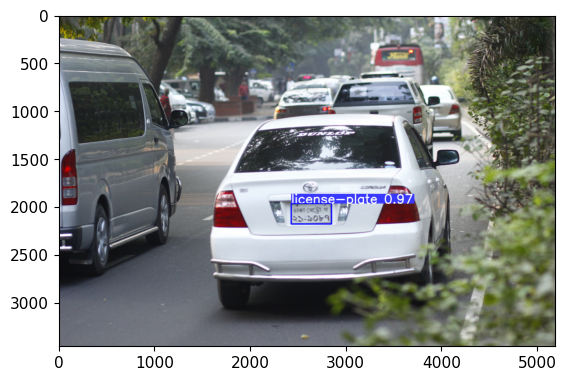

In [37]:
ncopy_img  = image.copy()
cv2.rectangle(ncopy_img, (location_arr[0], location_arr[1]), (location_arr[2], location_arr[3]), (255,0,0), 5)

%matplotlib inline 

plt.imshow(cv2.cvtColor(ncopy_img, cv2.COLOR_BGR2RGB))


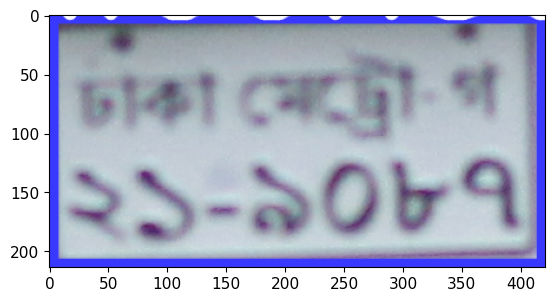

In [92]:
cropped_image  = image[location_arr[1]:location_arr[3], location_arr[0]:location_arr[2]]

%matplotlib inline 

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))



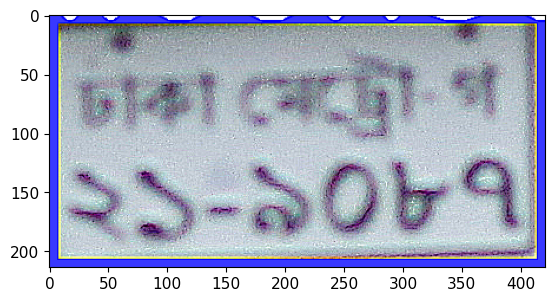

In [78]:
# Sharp process 1 (not good enough)
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# Applying cv2.filter2D function
sharpen_img = cv2.filter2D(cropped_image,-1,filter)
plt.imshow(cv2.cvtColor(sharpen_img, cv2.COLOR_BGR2RGB))

In [91]:
# using adaptive threshold (failed attempt)
# adaptive = cv2.adaptiveThreshold(cropped_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 81,4)
# # plt.imshow(cv2.cvtColor(adaptive, cv2.COLOR_BGR2RGB))

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1676: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


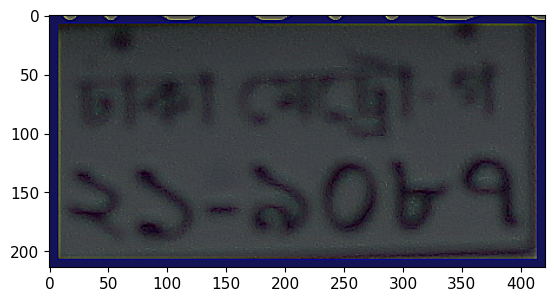

In [105]:
# sharp process 2 (not good enough)

kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]], np.float32) 

kernel = 1/3 * kernel

shrp_img = cv2.filter2D(cropped_image, -1, kernel)
plt.imshow(cv2.cvtColor(shrp_img, cv2.COLOR_BGR2RGB))

In [ ]:
# using PIL and Tensorflow sharpening failed attempt

# img_pil = T.ToPILImage()(cropped_image)
# sharp_img = F.adjust_sharpness(img_pil, 5.0)
# img_tensor = T.

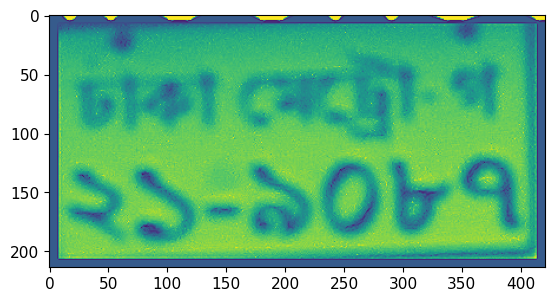

In [98]:
# sharp filter 3 (not good enough)
sharpen_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharped_img = cv2.filter2D(cropped_image, -1, sharpen_filter)
plt.imshow(cv2.cvtColor(sharped_img, cv2.COLOR_BGR2GRAY))

In [75]:
reader = easyocr.Reader(['bn'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [110]:
#result = reader.readtext(cropped_img)
result = reader.readtext(sharped_img, detail=1, paragraph=True) #change img variable from here
print(result)

[[[[8, 29], [411, 29], [411, 207], [8, 207]], 'ঢা41 বেড্রো  ২১-৯০৮৭']]


In [41]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
# res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

NameError: name 'img' is not defined

In [ ]:
x = location.xcenter[0]
y = location.ycenter[0]
w = location.width[0]
h = location.height[0]

In [ ]:
x

In [ ]:
cropped_image = torchvision.transforms.functional.crop(image, x, y, h, w)

cropped_image = torchvision.transforms.functional.crop(img: image, top: x, left: y, height: h, width: w)

In [ ]:
print(xmin[0])

In [ ]:
(x1, y1) = (np.min(xmin), np.min(ymin))
(x2, y2) = (np.max(xmax), np.max(ymax))

cropped_img = img[x1:x2+1, y1:y2+1]

In [ ]:
# result.save(save_dir='G:/CSE_498r/project2/')

In [ ]:
# torch.save(model01, 'G:/CSE_498r/project/model.py')
path = "G:/CSE_498r/project/vid_test02.mp4"

In [ ]:
# !cd yolov5 && python model01 --source path

In [ ]:
# Open the video
cap = cv2.VideoCapture("vid_test02.mp4")
ret, frame = cap.read()

cap.release()
    

In [ ]:
result = model01(frame)

In [ ]:
result.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [ ]:
result.crop(save=True, save_dir='G:/CSE_498r/project/test_vid', exist_ok=False)

In [ ]:
# ret, frame = cap.read()

# cap.release()
    
# plt.imshow(frame[:,:,::-1]) # OpenCV uses BGR, whereas matplotlib uses RGB
# plt.show()


In [ ]:

# # Get the frames per second (fps) of the video
# fps = cap.get(cv2.CAP_PROP_FPS)

# # Define the codec and create a video writer object
# # fourcc = cv2.VideoWriter_fourcc(*"mp4v")
# # out = cv2.VideoWriter("output.mp4", fourcc, fps, (640, 352))

# # Loop through each frame of the video
# while cap.isOpened():
#     # Read the next frame
#     ret, frame = cap.read()

#     # Break if the video has ended
#     if not ret:
#         break

#     # Preprocess the frame
# #     frame = preprocess(frame)

#     # Convert the frame to a PyTorch tensor
#     frame = torch.from_numpy(frame).unsqueeze(0)

#     # Run the frame through the model
#     output = model01(frame)

#     # Postprocess the output
#     output = postprocess(output)

#     # Write the output frame to the video
#     out.write(output)

# # Release the video objects
# cap.release()
# out.release()